In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [48]:
train=pd.read_csv('D:\\Gandhi\\Machine Learning\\Datasets\\Loan_prediction\\train.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [49]:
train.shape

(614, 13)

In [50]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [52]:
numerical=train.select_dtypes(['float64','int64']).columns
categorical=train.iloc[:,0:12].select_dtypes(['object']).columns

print("Numerical variables:",numerical)
print("Categorical variables:",categorical)

Numerical variables: Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
Categorical variables: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object')


In [53]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [54]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [55]:
#target
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

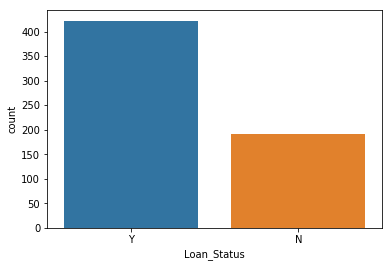

In [56]:
sn.countplot(train.Loan_Status)

In [57]:
#independent Variables
#Univarient variables
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [58]:
ApplicantIncome_cv=train['ApplicantIncome'].std()/train['ApplicantIncome'].mean()
CoapplicantIncome_cv=train['CoapplicantIncome'].std()/train['CoapplicantIncome'].mean()
LoanAmount_cv=train['LoanAmount'].std()/train['LoanAmount'].mean()
Loan_Amount_Term_cv=train['Loan_Amount_Term'].std()/train['Loan_Amount_Term'].mean()
Credit_History_cv=train['Credit_History'].std()/train['Credit_History'].mean()

print("Co-efficient of varience of ApplicantIncome:",ApplicantIncome_cv)
print("Co-efficient of varience of CoapplicantIncome:",CoapplicantIncome_cv)
print("Co-efficient of varience of LoanAmount:",LoanAmount_cv)
print("Co-efficient of varience of Loan_Amount_Term:",Loan_Amount_Term_cv)
print("Co-efficient of varience of Credit_History:",Credit_History_cv)

Co-efficient of varience of ApplicantIncome: 1.1305797551151708
Co-efficient of varience of CoapplicantIncome: 1.8049381363301926
Co-efficient of varience of LoanAmount: 0.5845643146838528
Co-efficient of varience of Loan_Amount_Term: 0.19041055513044608
Co-efficient of varience of Credit_History: 0.43324499378806813


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


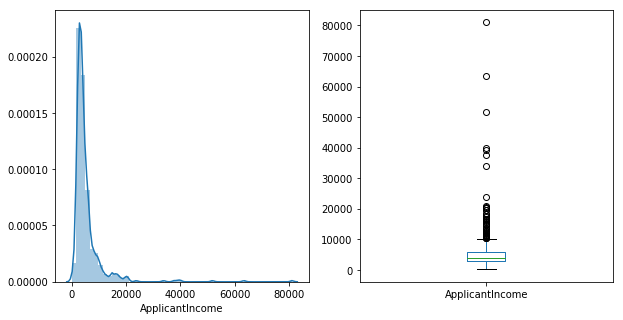

In [59]:
plt.figure(1)
plt.subplot(121)
sn.distplot(train['ApplicantIncome'])

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(10,5))

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


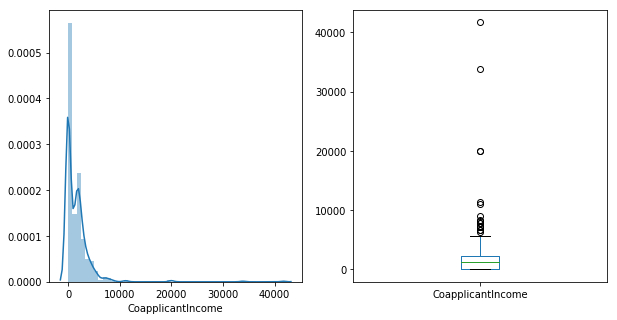

In [60]:
plt.figure(1)
plt.subplot(121)
sn.distplot(train['CoapplicantIncome'])

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(10,5))

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


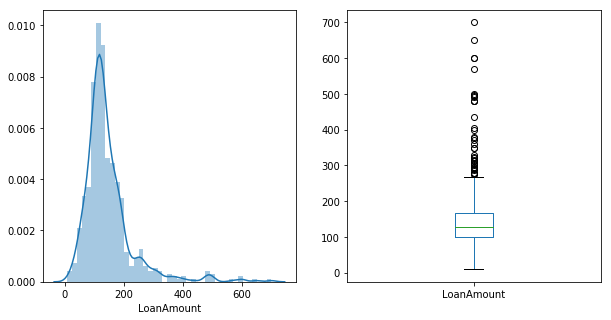

In [61]:
plt.figure(1)
plt.subplot(121)
sn.distplot(train['LoanAmount'].dropna())

plt.subplot(122)
train['LoanAmount'].dropna().plot.box(figsize=(10,5))

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


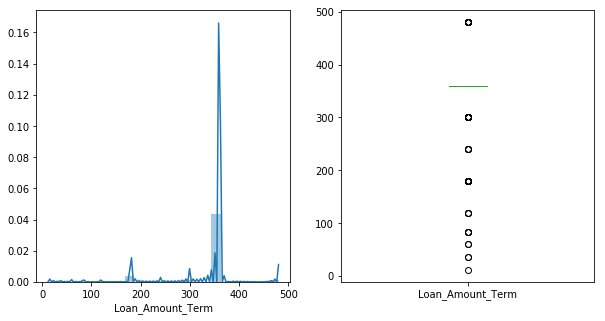

In [62]:
plt.figure(1)
plt.subplot(121)
sn.distplot(train['Loan_Amount_Term'].dropna())

plt.subplot(122)
train['Loan_Amount_Term'].dropna().plot.box(figsize=(10,5))

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


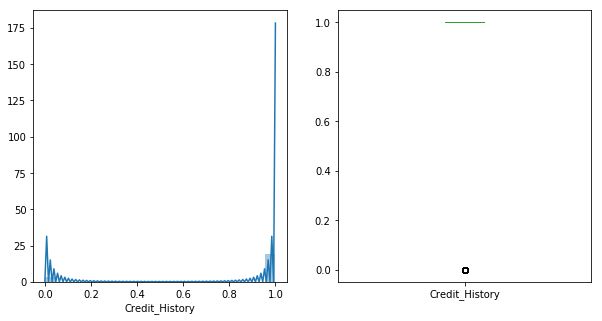

In [63]:
plt.figure(1)
plt.subplot(121)
sn.distplot(train['Credit_History'].dropna())

plt.subplot(122)
train['Credit_History'].dropna().plot.box(figsize=(10,5))

plt.show()

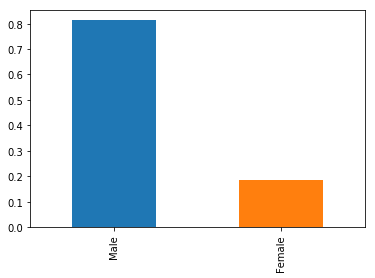

In [64]:
#for categorical variables
train['Gender'].value_counts(normalize=True).plot.bar()

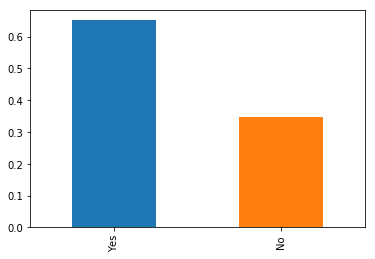

In [65]:
train['Married'].value_counts(normalize=True).plot.bar()

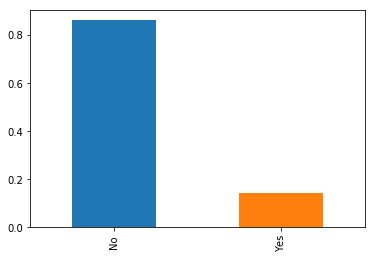

In [66]:
train['Self_Employed'].value_counts(normalize=True).plot.bar()

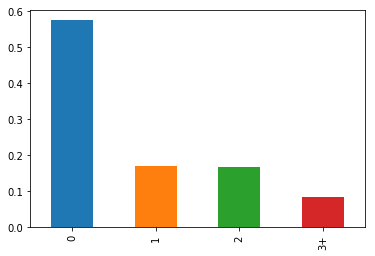

In [67]:
train['Dependents'].value_counts(normalize=True).plot.bar()

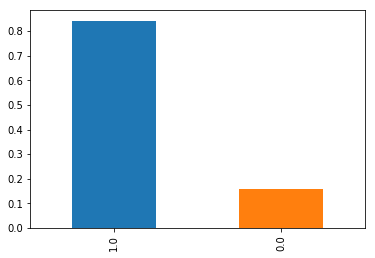

In [68]:
train['Credit_History'].value_counts(normalize=True).plot.bar()

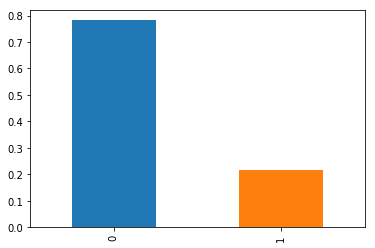

In [83]:
train['Education'].value_counts(normalize=True).plot.bar()

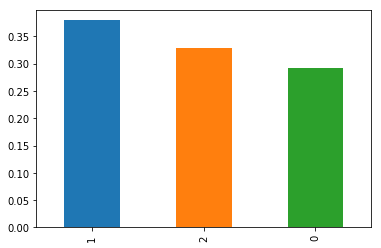

In [84]:
train['Property_Area'].value_counts(normalize=True).plot.bar()

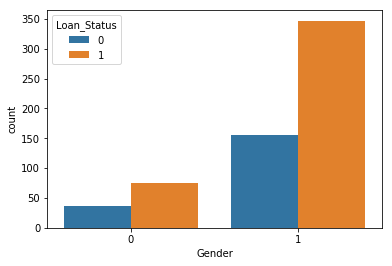

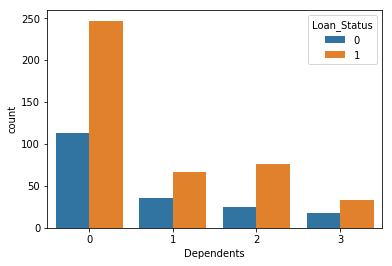

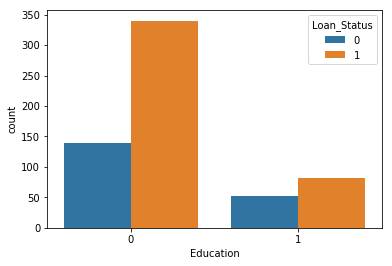

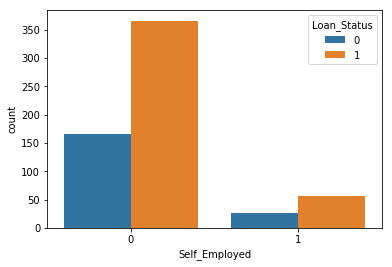

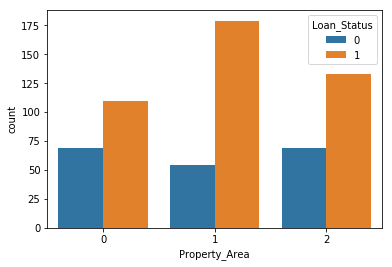

In [88]:
sn.countplot(train['Gender'],hue=train['Loan_Status'])
plt.show()

sn.countplot(train['Dependents'], hue=train['Loan_Status'])
plt.show()

sn.countplot(train['Education'], hue=train['Loan_Status'])
plt.show()

sn.countplot(train['Self_Employed'], hue=train['Loan_Status'])
plt.show()

sn.countplot(train['Property_Area'], hue=train['Loan_Status'])
plt.show()


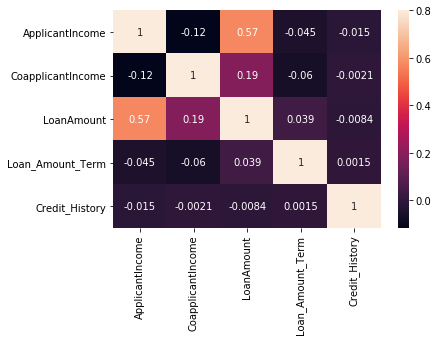

In [69]:
corr_matrix=train[numerical].corr()
sn.heatmap(corr_matrix,annot=True,vmax=0.8)

In [71]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [72]:
#train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)

In [73]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [76]:
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)

In [79]:
train['LoanAmount'].fillna(train['LoanAmount'].mean(),inplace=True)
train['Self_Employed'].fillna('No',inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [80]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [82]:
from sklearn.preprocessing import LabelEncoder
a=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
#var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le=LabelEncoder()
for i in a:
    train[i]=le.fit_transform(train[i])
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [129]:
x=train.drop(['Loan_Status','Loan_ID'],axis='columns')
#x.head()

#X = train[['Credit_History','Gender','Married','Education']]
y = train['Loan_Status']


In [131]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [132]:
#y=train.Loan_Status
#y.head()
#from sklearn.tree import DecisionTreeClassifier
#model = DecisionTreeClassifier()
model.fit(x,y)
#predictions = model.predict(X)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [136]:
model.predict([[1,1,1,0,0,4583,1508,128,360,1,0]])

array([0], dtype=int64)

In [133]:
model.score(x,y)

1.0

In [109]:
from sklearn import linear_model
reg=linear_model.LogisticRegression()

In [112]:
reg.fit(X,y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [113]:
reg.score(X,y)

0.8094462540716613

In [124]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [125]:
lr=cross_val_score(LogisticRegression(),X,y)
lr.mean()

0.8094850948509485

In [137]:
svm=cross_val_score(SVC(),X,y)
svm.mean()

0.8094850948509485

In [138]:
import pickle

In [139]:
with open('loan','wb') as f:
    pickle.dump(model,f)